In [1]:
import csv
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [2]:
data=pd.read_csv("titanic-passengers.csv",delimiter=";")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


# Data Profiling

In [4]:
profile = ProfileReport(data)

In [5]:
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

from sklearn.model_selection import train_test_split
def split(data):
    features= data.drop(['Survived'],axis=1).values
    target = data['Survived'].values
    features_train, features_test , target_train, target_test, = train_test_split(features, target, test_size=0.25, random_state=42)
    features_train=pd.DataFrame(features_train)
    features_test=pd.DataFrame(features_test)
    target_train=pd.DataFrame(target_train)
    target_test=pd.DataFrame(target_test)
    
    
    return(features_train, features_test, target_train, target_test)
features_train, features_test, target_train, target_test=split(data)

# Data Preprocessing

In [6]:
data['Title'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

In [7]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr":         "Mr",
                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master"

                    }

In [8]:
data.Title = data.Title.map(Title_Dictionary)

In [9]:
data.Title

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Title, Length: 891, dtype: object

## data splitting

In [10]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(data[["Pclass","Title", "Sex", "Age","Fare" ]], data[["Survived"]],test_size=0.2)


## Label Encoding

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [12]:
label_train['Survived']= label_encoder.fit_transform(label_train['Survived'])
label_train['Survived'].unique()

array([0, 1])

In [13]:
label_test['Survived']= label_encoder.fit_transform(label_test['Survived'])
label_test['Survived'].unique()

array([1, 0])

In [14]:
#def transform_label_data(label_train, label_test):
 #   label_train['Survived']= label_encoder.fit_transform(label_train['Survived']) 
  #  label_train['Survived'].unique()
   # label_test['Survived']= label_encoder.fit_transform(label_test['Survived']) 
    #label_test['Survived'].unique()
    #return transformed_label_train
#transformed_label_train= transform_label_data (label_train, label_test)

## One Hot Encoder 

### Encodind "Sex"

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
feature_train[['male','female']]=enc.fit_transform(feature_train[['Sex']]).toarray()
feature_test[['male','female']]=enc.fit_transform(feature_test[['Sex']]).toarray()


### Encoding "Title"

In [16]:
feature_train.Title.value_counts()

Mr         410
Miss       154
Mrs         98
Master      34
Officer     13
Royalty      3
Name: Title, dtype: int64

In [17]:
feature_test.Title.value_counts()

Mr         107
Miss        31
Mrs         28
Master       6
Officer      5
Royalty      2
Name: Title, dtype: int64

In [18]:
feature_train[['Mr','Miss','Mrs','Master','Officer','Royalty' ]]=enc.fit_transform(feature_train[['Title']]).toarray()

In [20]:
feature_test[['Mr','Miss','Mrs','Master','Officer','Royalty' ]]=enc.fit_transform(feature_test[['Title']]).toarray()

In [22]:
feature_test

,Pclass,Title,Sex,Age,Fare,male,female,Mr,Miss,Mrs,Master,Officer,Royalty
469,1,Miss,female,18.0,79.6500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
443,2,Mr,male,31.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
203,3,Mr,male,NaN,69.5500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
590,3,Mr,male,NaN,24.1500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
618,3,Mr,male,17.0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,3,Mr,male,33.0,7.8958,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
717,3,Mr,male,29.0,7.0458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
372,1,Mr,male,NaN,29.7000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
144,2,Mr,male,62.0,10.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Replacing Missing Values

In [23]:
median = feature_train.Age.median()
median

28.0

In [24]:
median1 = feature_test.Age.median()
median1

29.5

In [25]:
feature_train.Age.fillna(median , inplace = True)

In [26]:
feature_test.Age.fillna(median1 , inplace = True)

In [27]:
feature_test.isnull().sum()

Pclass     0
Title      0
Sex        0
Age        0
Fare       0
male       0
female     0
Mr         0
Miss       0
Mrs        0
Master     0
Officer    0
Royalty    0
dtype: int64

In [38]:
transformed_feature_train=feature_train.drop(labels=['Sex','Title'], axis=1)

In [39]:
transformed_feature_test=feature_test.drop(labels=['Sex','Title'], axis=1)

In [40]:
# check the shape of training df , test df

In [41]:
transformed_feature_train

,Pclass,Age,Fare,male,female,Mr,Miss,Mrs,Master,Officer,Royalty
668,3,41.0,20.2125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
490,3,40.0,7.8958,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
398,1,48.0,39.6000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
625,3,40.5,14.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
206,2,24.0,13.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
632,3,20.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
544,3,25.0,0.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
879,3,28.0,7.7500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
101,3,28.0,6.8583,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
transformed_feature_test

,Pclass,Age,Fare,male,female,Mr,Miss,Mrs,Master,Officer,Royalty
469,1,18.0,79.6500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
443,2,31.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
203,3,29.5,69.5500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
590,3,29.5,24.1500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
618,3,17.0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
327,3,33.0,7.8958,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
717,3,29.0,7.0458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
372,1,29.5,29.7000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
144,2,62.0,10.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# DecisionTreeClassifier

In [43]:
from sklearn import tree

In [52]:
import matplotlib.pyplot as plt

In [44]:
dt = tree.DecisionTreeClassifier()  
dt.fit(transformed_feature_train, label_train)   #fitting our model
y_pred=dt.predict(transformed_feature_test)   # evaluating our model


In [60]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [49]:
y_pred_1=dt.predict(transformed_feature_train)

In [45]:
from sklearn.metrics import accuracy_score

### we get the accuracy with label train and also label test

In [46]:
print("score:{}".format(accuracy_score(label_test, y_pred)))

score:0.6815642458100558


In [50]:
print("score:{}".format(accuracy_score(label_train, y_pred_1)))

score:0.9803370786516854


### plotting the decision tree

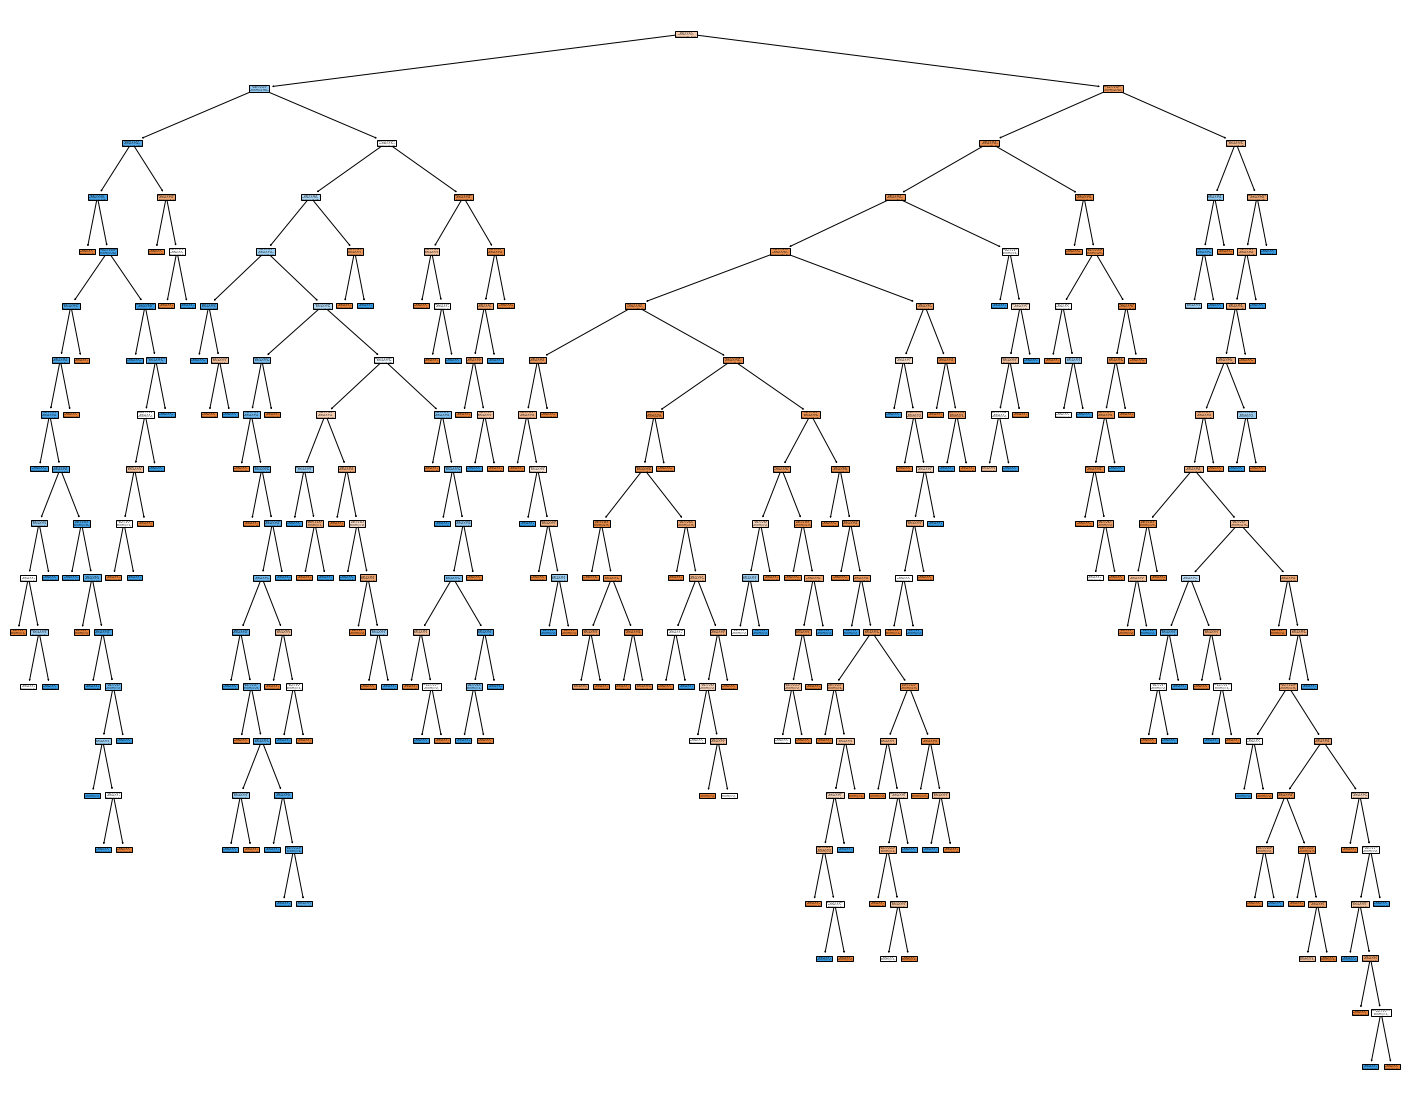

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=transformed_feature_train.columns, filled=True)


ameliorer le moded en changeant les hyper-parameters

## hyper parameters  tuning or  hyper parameters optimisation 

#### Grid search helps you optimize hyper parameters of a DecisionTree

In [62]:
from sklearn.model_selection import GridSearchCV


In [128]:
tree_para = {'ccp_alpha':[0.0, 0.002, 0.004, 0.006], 'max_depth':[7,8,10,12],'criterion':['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), tree_para)
clf.fit(transformed_feature_train, label_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.0, 0.002, 0.004, 0.006],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 10, 12]})

In [129]:
clf.best_score_

0.8426671919629666

In [130]:
clf.best_params_

{'ccp_alpha': 0.004, 'criterion': 'gini', 'max_depth': 7}

In [132]:
dt1 = tree.DecisionTreeClassifier(random_state=0, max_depth=7,ccp_alpha= 0.004)

In [133]:
dt1.fit(transformed_feature_train, label_train)   #fitting our model
y_pred_2=dt1.predict(transformed_feature_test)   # evaluating our model

In [134]:
print("score:{}".format(accuracy_score(label_test, y_pred_2)))

score:0.8044692737430168


#### when changin hyper parameters with max_depth=7 and ccp_alpha=0.004 we can immprove the accuracy from 0.6815642458100558 to 0.8044692737430168

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 5, random_state =9)



In [107]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}

In [88]:
rf.fit(transformed_feature_train, label_train)


C:\Users\ASUS\AppData\Local\Temp/ipykernel_2628/1846423658.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(transformed_feature_train, label_train)


RandomForestClassifier(n_estimators=5, random_state=9)

In [90]:
from sklearn import metrics

In [91]:
y_pred_3=rf.predict(transformed_feature_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(label_test, y_pred_3))

Accuracy: 0.7318435754189944


In [94]:
y_pred_4=rf.predict(transformed_feature_train)  #testing our model
print("Accuracy:", metrics.accuracy_score(label_train, y_pred_4))

Accuracy: 0.9634831460674157


In [95]:
random_tree_para = {'n_estimators':[3,5,4,6]}
clf_1 = GridSearchCV(RandomForestClassifier(), random_tree_para)
clf_1.fit(transformed_feature_train, label_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [3, 5, 4, 6]})

In [96]:
clf_1.best_score_

0.8117305229981285

In [97]:
clf_1.best_params_

{'n_estimators': 6}

In [108]:
rf_1 = RandomForestClassifier(n_estimators = 6,max_depth=8, random_state =9)

In [109]:
rf_1.fit(transformed_feature_train, label_train)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2628/1187814677.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_1.fit(transformed_feature_train, label_train)


RandomForestClassifier(max_depth=8, n_estimators=6, random_state=9)

In [110]:
y_pred_5=rf_1.predict(transformed_feature_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(label_test, y_pred_5))

Accuracy: 0.8100558659217877


In [112]:
y_pred_6=rf_1.predict(transformed_feature_train)  #testing our model
print("Accuracy:", metrics.accuracy_score(label_train, y_pred_6))

Accuracy: 0.9058988764044944


### when changin hyper parameters with max_depth=8 and n_estimator=6 we can immprove the accuracy from 0.73to 0.81